In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

In [16]:
filename = 'sales_data_sample.csv'
df = pd.read_csv(filename)

In [17]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [18]:
df_sales = df[["PRICEEACH", "SALES"]]
df_sales.head()
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRICEEACH  2823 non-null   float64
 1   SALES      2823 non-null   float64
dtypes: float64(2)
memory usage: 44.2 KB


In [19]:
df_sales = df_sales.sample(200)

In [20]:
max_price = df_sales.PRICEEACH.max()

In [21]:
df_sales = df_sales[df_sales.PRICEEACH < max_price]

In [22]:
df_sales.shape

(117, 2)

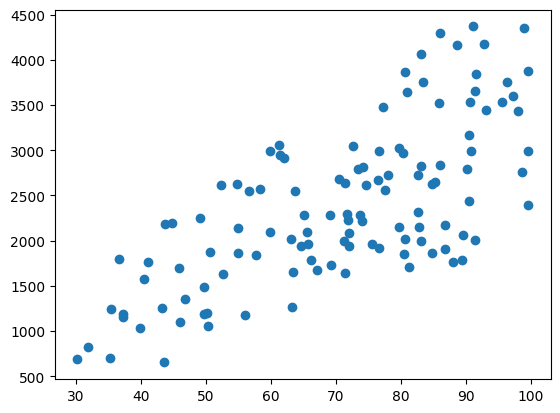

In [23]:
plt.scatter(df_sales.PRICEEACH, df_sales.SALES)

In [24]:
x = df_sales[["PRICEEACH"]].values
y = df_sales["SALES"].values

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6,random_state=42)


In [26]:
n_fit = x_train.shape[0]
x_train.shape

(70, 1)

In [27]:
k_value_min = 1
k_value_max = n_fit

k_list = np.linspace(k_value_min, k_value_max, k_value_max)

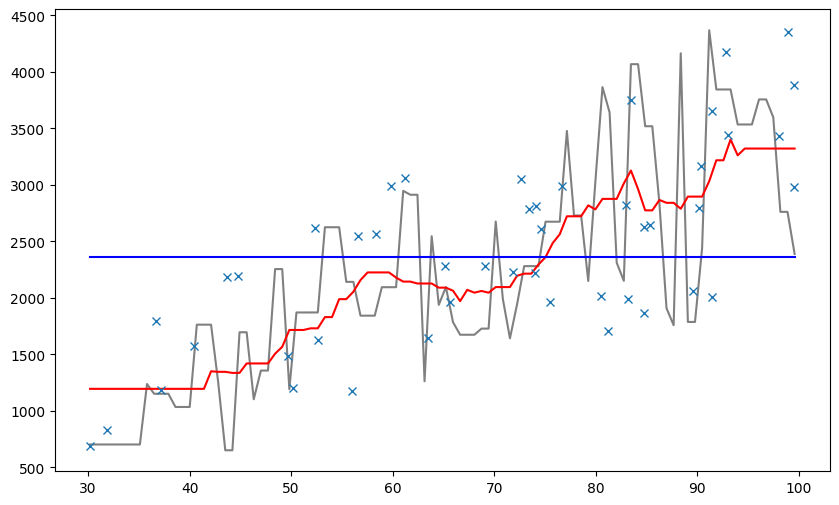

In [28]:
fig, ax = plt.subplots(figsize=(10,6))

j=0

for k_value in k_list:

    model = KNeighborsRegressor(n_neighbors=int(k_value))

    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    colors = ['grey','r','b']
    if k_value in [1,10,70]:
        xvals = np.linspace(x.min(), x.max(), 100).reshape(-1,1) # -1 will essentially just be inferred as the length of the array
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds,'-', label = f'k = {int(k_value)}', color=colors[j])
        j+=1


ax.plot(x_test, y_test, 'x')